In [1]:
import GEOparse

DATA_PATH = r"./datasets/"

gse = GEOparse.get_GEO(geo="GSE309097", destdir=DATA_PATH)
print(gse)

30-Oct-2025 18:28:30 DEBUG utils - Directory ./datasets/ already exists. Skipping.
30-Oct-2025 18:28:30 INFO GEOparse - File already exist: using local version.
30-Oct-2025 18:28:30 INFO GEOparse - Parsing ./datasets/GSE309097_family.soft.gz: 
30-Oct-2025 18:28:30 DEBUG GEOparse - DATABASE: GeoMiame
30-Oct-2025 18:28:30 DEBUG GEOparse - SERIES: GSE309097
30-Oct-2025 18:28:30 DEBUG GEOparse - PLATFORM: GPL24676
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260550
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260551
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260552
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260553
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260554
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260555
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260556
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260557
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260558
30-Oct-2025 18:28:30 DEBUG GEOparse - SAMPLE: GSM9260559
30-Oct-2025 18:2

<SERIES: GSE309097 - 17 SAMPLES, 1 d(s)>


In [2]:
additional_files = gse.download_supplementary_files(DATA_PATH)

30-Oct-2025 18:28:30 DEBUG utils - Directory /Users/pierremarschall/Documents/dev/scientalab/251030_snRNA-10XFlex/datasets already exists. Skipping.
30-Oct-2025 18:28:30 INFO GEOTypes - Downloading SRA files for GSM9260550 series

30-Oct-2025 18:28:30 DEBUG utils - Directory /Users/pierremarschall/Documents/dev/scientalab/251030_snRNA-10XFlex/datasets/Supp_GSM9260550_230628_Flex_GPP_10 already exists. Skipping.
30-Oct-2025 18:28:30 INFO downloader - File /Users/pierremarschall/Documents/dev/scientalab/251030_snRNA-10XFlex/datasets/Supp_GSM9260550_230628_Flex_GPP_10/GSM9260550_8821-JF-10_barcodes.tsv.gz already exist. Use force=True if you would like to overwrite it.
30-Oct-2025 18:28:30 INFO downloader - File /Users/pierremarschall/Documents/dev/scientalab/251030_snRNA-10XFlex/datasets/Supp_GSM9260550_230628_Flex_GPP_10/GSM9260550_8821-JF-10_features.tsv.gz already exist. Use force=True if you would like to overwrite it.
30-Oct-2025 18:28:30 INFO downloader - File /Users/pierremarschal

In [ ]:
import csv
import gzip
import os
import scipy.io
import pandas as pd

for gsm_id, files in additional_files.items():
    if os.path.isfile(os.path.join(DATA_PATH,"expression_matrices",f"{gsm_id}_matrix.tsv")):
        print(f"Skipping {gsm_id}: file already exists")
        continue
    filenames = iter(files.values())
    barcode_filename = next(filenames)
    feature_filename = next(filenames)
    matrix_filename = next(filenames)
    
    mat = scipy.io.mmread(matrix_filename)
    
    feature_ids = [row[0] for row in csv.reader(gzip.open(feature_filename, mode="rt"), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(gzip.open(feature_filename, mode="rt"), delimiter="\t")]
    feature_types = [row[2] for row in csv.reader(gzip.open(feature_filename, mode="rt"), delimiter="\t")]
    
    barcodes = [row[0] for row in csv.reader(gzip.open(barcode_filename, mode="rt"), delimiter="\t")]
    
    matrix = pd.DataFrame.sparse.from_spmatrix(mat)
    matrix.columns = barcodes
    matrix.insert(loc=0, column="feature_id", value=feature_ids)
    matrix.insert(loc=0, column="gene", value=gene_names)
    matrix.insert(loc=0, column="feature_type", value=feature_types)
    print(f"Processed {gsm_id}")
    
    matrix.to_csv(os.path.join(DATA_PATH,"expression_matrices",f"{gsm_id}_matrix.tsv"), sep="\t")    

Skipping GSM9260550: file already exists
Skipping GSM9260551: file already exists
Skipping GSM9260552: file already exists
Skipping GSM9260553: file already exists
Skipping GSM9260554: file already exists
Skipping GSM9260555: file already exists
Skipping GSM9260556: file already exists
Skipping GSM9260557: file already exists
Skipping GSM9260558: file already exists
Skipping GSM9260559: file already exists
Skipping GSM9260560: file already exists
Skipping GSM9260561: file already exists
Skipping GSM9260562: file already exists
Skipping GSM9260563: file already exists
Skipping GSM9260564: file already exists
Skipping GSM9260565: file already exists
Skipping GSM9260566: file already exists


[]

In [11]:
datasets = []
dataset_sizes = []
dataset_disease = ["GPP"] * 13 + ["HC"] * 4

for gsm_id, files in additional_files.items():
    if os.path.isfile(os.path.join(DATA_PATH,"expression_matrices",f"{gsm_id}_matrix.tsv")):
        with open(os.path.join(DATA_PATH,"expression_matrices",f"{gsm_id}_matrix.tsv"), mode="r") as f:
            row = next(csv.reader(f, delimiter="\t"))
            dataset_sizes.append(len(row) - 4)
            datasets.append(gsm_id)
    else:
        print("Missing file for", gsm_id)

In [12]:
print(*(f"{gsm_id}: {size} cells" for gsm_id, size in zip(datasets, dataset_sizes)), sep="\n")

GSM9260550: 1727 cells
GSM9260551: 1039 cells
GSM9260552: 1957 cells
GSM9260553: 1307 cells
GSM9260554: 7871 cells
GSM9260555: 2303 cells
GSM9260556: 5800 cells
GSM9260557: 15642 cells
GSM9260558: 6052 cells
GSM9260559: 5793 cells
GSM9260560: 11592 cells
GSM9260561: 2613 cells
GSM9260562: 4833 cells
GSM9260563: 5075 cells
GSM9260564: 348 cells
GSM9260565: 3592 cells
GSM9260566: 6535 cells


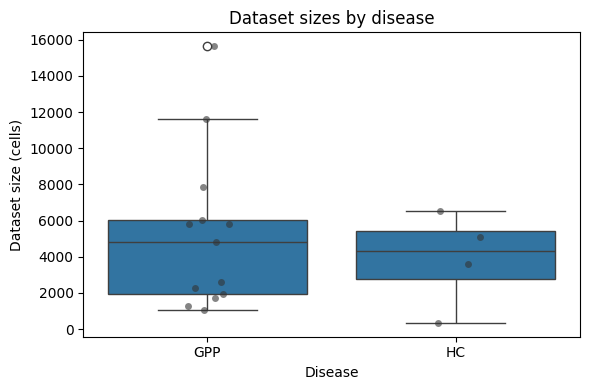

In [13]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# build a DataFrame from existing variables
df_plot = pd.DataFrame({"disease": dataset_disease, "size": dataset_sizes})

plt.figure(figsize=(6, 4))
sns.boxplot(x="disease", y="size", data=df_plot)
sns.stripplot(x="disease", y="size", data=df_plot, color="0.2", alpha=0.6, jitter=True)
plt.xlabel("Disease")
plt.ylabel("Dataset size (cells)")
plt.title("Dataset sizes by disease")
plt.tight_layout()
plt.show()